## 6.10 Adam算法
话说“天下大势合久必分，分久必合”，深度学习优化算法的比拼历程就精彩的上演着同样的故事。前面几节，我们从梯度下降开始，介绍了它的两种变体，随机梯度下降、小批量随机梯度下降，然后有介绍了改进梯度计算的动量法，以及改善学习率的Adagrad算法、RMSProp算法和Adadelta算法。有没有人琢磨着把它们的优点结合起来搞个大杂烩呢？必然的，这就是由Diederik Kingma和Jimmy Ba在2014年提出的Adam算法了。本节咱们就来详细介绍。

### 6.10.1 基本原理

Adam算法是在RMSProp算法的基础上提出的，并且使用了指数加权平均数来调整学习率。Adam算法被广泛用于神经网络的训练过程中，因为它能够自适应学习率，使得训练过程更加顺畅。Adam算法在传统梯度下降算法的基础上具体是怎么改进的呢，咱们来看它的数学公式：
$$m_t = \beta_1 m_{t-1} + (1 - \beta_1)g_t$$
$$v_t = \beta_2 v_{t-1} + (1 - \beta_2)g_t^2$$
$$\hat{m_t} = \frac{m_t}{1 - \beta_1^t}$$
$$\hat{v_t} = \frac{v_t}{1 - \beta_2^t}$$
$$\Delta w_t = -\frac{\alpha \hat{m_t}}{\sqrt{\hat{v_t}} + \epsilon}$$

其中，$m_t$ 和 $v_t$ 分别表示梯度的一阶积分和二阶积分，$\hat{m_t}$ 和 $\hat{v_t}$ 分别表示 $m_t$ 和 $v_t$ 的无偏估计，$\alpha$ 表示学习率，$\beta_1$ 和 $\beta_2$ 分别表示指数加权平均数的衰减率，$\epsilon$ 是一个很小的正数，用于防止分母为 $0$ 的情况。


### 6.10.2 算法流程

在使用Adam算法训练神经网络时，我们需要设置一些参数，包括学习率 $\alpha$，指数加权平均数的衰减率 $\beta_1$ 和 $\beta_2$，以及一个很小的正数 $\epsilon$。我们可以使用如下的步骤来训练一个神经网络：

1. 初始化网络的权重和偏置，并定义损失函数和Adam优化器。
2. 在训练数据上进行前向传播。
3. 计算损失。
4. 进行反向传播。
5. 使用Adam优化器更新权重和偏置。
6. 重复步骤 2-5，直到达到规定的训练步数

### 6.10.3 代码示例

我们用一个例子演示在 PyTorch 中实现 Adam 算法并可视化训练过程：

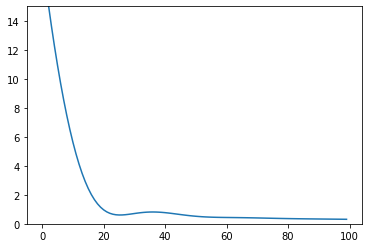

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# 首先，我们定义一个随机训练数据
np.random.seed(0)
x = np.random.uniform(0, 2, 100)
y = x * 3 + 1 + np.random.normal(0, 0.5, 100)

# 将训练数据转换为 PyTorch Tensor
x = torch.from_numpy(x).float().view(-1, 1)
y = torch.from_numpy(y).float().view(-1, 1)

# 然后，我们定义一个线性模型和损失函数
model = torch.nn.Linear(1, 1)
loss_fn = torch.nn.MSELoss()

# 接下来，我们使用 Adam 优化器来训练模型
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

# 初始化用于可视化训练过程的列表
losses = []

# 开始训练循环
for i in range(100):
    # 进行前向传递，计算损失
    y_pred = model(x)
    loss = loss_fn(y_pred, y)

    # 将损失存储到列表中，以便我们可视化
    losses.append(loss.item())

    # 进行反向传递，更新参数
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# 可视化训练过程
plt.plot(losses)
plt.ylim((0, 15))
plt.show()

**梗直哥提示：adam算法在使用过程中还是有不少细节需要注意的，也需要调参实战经验的总结。多动手多体会。当然，也可以欢迎选修进阶课程帮你加快这个过程《梗直哥的深度学习必修课：python实战》**

[Next 6-11 学习率调节器](./6-11%20学习率调节器.ipynb)